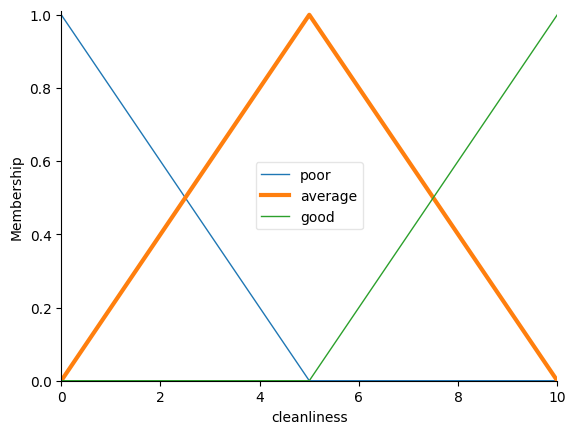

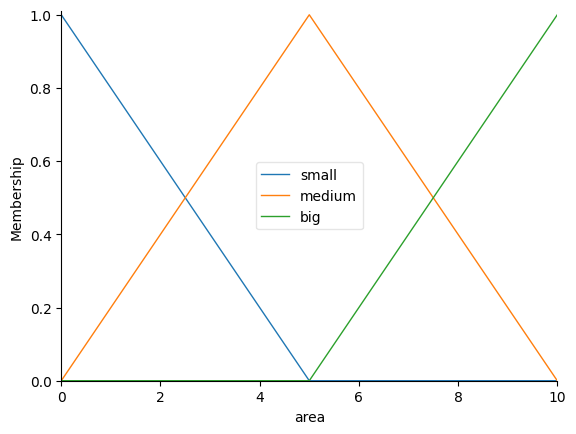

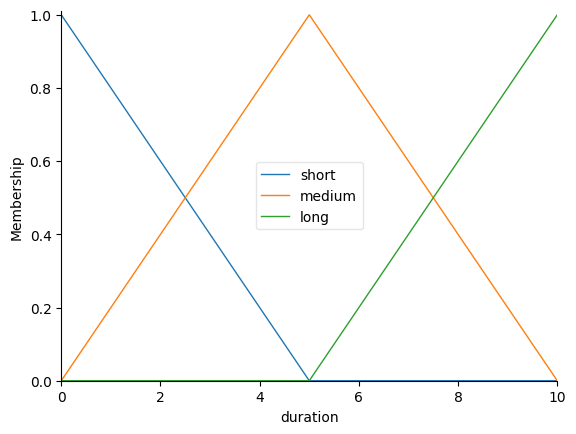

In [58]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
cleanliness = ctrl.Antecedent(np.arange(0, 11, 1), 'cleanliness')
area = ctrl.Antecedent(np.arange(0, 11, 1), 'area')
duration = ctrl.Consequent(np.arange(0, 11, 1), 'duration')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cleanliness.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
duration['short'] = fuzz.trimf(duration.universe, [0, 0, 5])
duration['medium'] = fuzz.trimf(duration.universe, [0, 5, 10])
duration['long'] = fuzz.trimf(duration.universe, [5, 10, 10])

area['small'] = fuzz.trimf(area.universe, [0, 0, 5])
area['medium'] = fuzz.trimf(area.universe, [0, 5, 10])
area['big'] = fuzz.trimf(area.universe, [5, 10, 10])

# You can see how these look with .view()
cleanliness['average'].view()

area.view()

duration.view()

In [59]:
rule1 = ctrl.Rule(cleanliness['poor'] | area['big'], duration['long'])
rule2 = ctrl.Rule(area['medium'], duration['medium'])
rule3 = ctrl.Rule(area['small'] | cleanliness['good'], duration['short'])

5.610169491525426


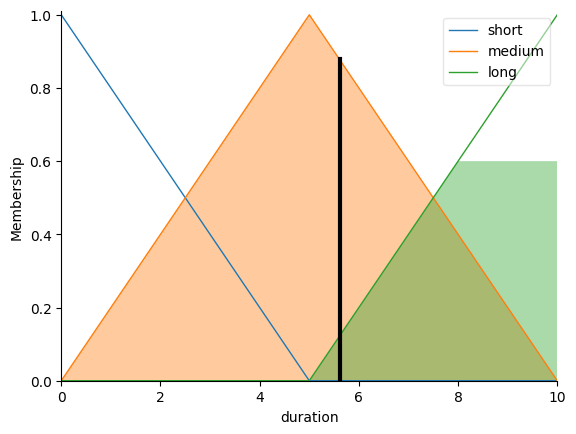

In [60]:
duration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

time = ctrl.ControlSystemSimulation(duration_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
time.input['cleanliness'] = 2
time.input['area'] = 5

# Crunch the numbers
time.compute()

# Once computed, we can view the result as well as visualize it.

print(time.output['duration'])
duration.view(sim=time)